## Assignment Case Study

In [32]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import metrics

#### Case Study: You have been hired by a technology company as part of an initiative to improve employee job satisfaction. Prior to your arrival, a survey was conducted to determine if self-rated job satisfaction (y) was related to the number of years the employee worked at this company (x)? 
    + The employee satisfaction rating was developed internally with a Likert rating scale from 1 to 5, where 1= Strongly Disagree and 5 = Strongly Agree. See below.

#### You will analyze this data and write a short report on the regression results and the background for the study. The department that hired you wants a professional summary that they can submit to the company managers. 

#### Directions: Conduct a simple linear regression test to determine the relationship between job satisfaction (y) and years at the company (x).

#### Submit this the HTML version of this Jupyter notebook with the analysis and answers to all questions.
#### Submit a 1-2 page MicroSoft Word document comprised of:
    + 1) problem statement: state the research study question, state the x and y variables, and describe the variables including thier data type
    + 2) journal articles: find two research papers (i.e. data collected & analyzed) from the library that examine employee job satisfaction. Summarize the results of those studies in a short paragraph. This provides 
    justification for studying job satisfaction in the current study.  Additionally, if your regression results are not significant, this research may suggest other variables to examine in future surveys. 
    + 3) Methodology: State the research question,  state the statistical test you are performing (i.e. simple 
    linear regresssion) and the the null and alternate hypotheses for that test. State which variable is the dependent variable and which is the independent variable. State how the study data was collected.
    + 4) Results: summarize your findings from the study in detail. Be sure you discuss the answer to the question: "Is job satisfaction statistically significantly  related to the number of years the employee worked at the company?"

#### Hint for the Word document: Answers to  analysis questions in this notebook should be included in the Word document. This includes mentioning the min and max of the x and y values.

+ Format: Use Times New Roman Font, 12 pt, double spaced
+ APA 7 reference: https://owl.purdue.edu/owl/research_and_citation/apa_style/apa_formatting_and_style_guide/reference_list_articles_in_periodicals.html

## https://www.simplypsychology.org/likert-scale.html

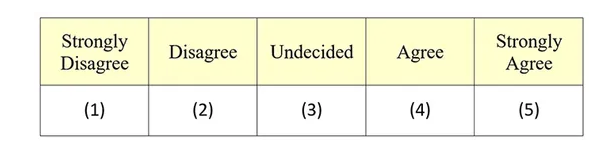

In [50]:
# read the data
df = pd.read_csv('job_satisfaction.csv')

In [51]:
# display data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   years_employed  200 non-null    int64
 1   satisfaction    200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [52]:
# describe the data
df.describe()

,years_employed,satisfaction
count,200.00000,200.000000
mean,4.51500,3.365000
std,1.66844,1.460287
min,2.00000,1.000000
25%,3.00000,2.000000
50%,5.00000,4.000000
75%,6.00000,5.000000
max,7.00000,5.000000


In [55]:
# Check for the number of missing data?
df.isnull().sum()


years_employed    0
satisfaction      0
dtype: int64

<AxesSubplot:xlabel='years_employed', ylabel='satisfaction'>

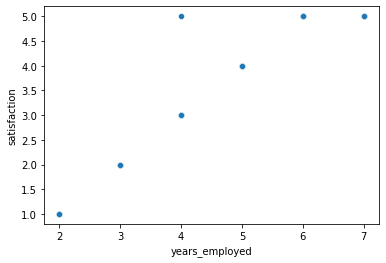

In [56]:
# check linear with a graph?

sns.scatterplot(x = "years_employed",y = "satisfaction",data = df)
plt.show()


In [57]:
# check correlation between x and y?
df.corr()


,years_employed,satisfaction
years_employed,1.000000,0.976407
satisfaction,0.976407,1.000000


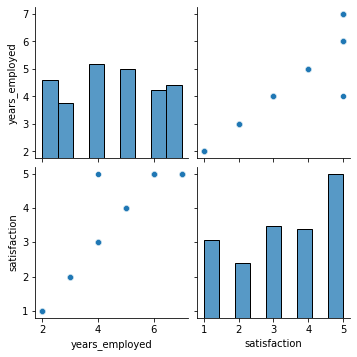

In [58]:
# plot relationship?

sns.pairplot(df)


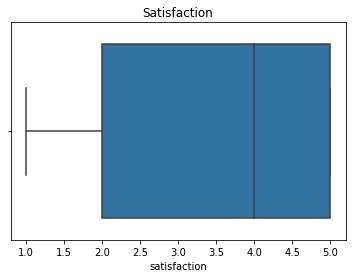

In [61]:
# boxplot of y

sns.boxplot(x = df.satisfaction)
plt.title('Satisfaction')
plt.show();


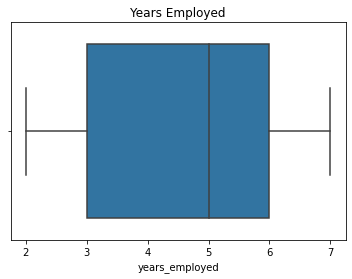

In [62]:
# boxplot of x

sns.boxplot(x = df.years_employed)
plt.title('Years Employed')
plt.show();


In [63]:
#  Linear Regression: remember that the parameters for ols(y ~ x).
# Be sure to put your y variable in the right place.

model = ols("satisfaction ~ years_employed", df).fit()
print(model.summary())
 

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     4048.
Date:                Sun, 17 Oct 2021   Prob (F-statistic):          9.13e-134
Time:                        19:11:23   Log-Likelihood:                -52.460
No. Observations:                 200   AIC:                             108.9
Df Residuals:                     198   BIC:                             115.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.4935      0.065     -7.

In [1]:
# Is the model significant? Justify your answer.

#We see the Prob (F-statistic) value which is 9.13e-134 and since that is < 0.05 so model is significant

In [65]:
# Is the relationship between x & y significant? We will analyze slope of regression line to determine this.
# Given b1 = the slope of the regression line
# H0: b1 = 0 (i.e. x coefficients are all zero)
# H1: b1 ≠ 0 (i.e. the x coefficients are not equal to zero)

model.pvalues



# Analysis: The p value ___is less than____ alpha, we ___reject_____ the null hypothesis and conclude that
# we have evidence that the slope of the regression line ____is not equal to zero_______________.

Intercept          9.371153e-13
years_employed    9.128737e-134
dtype: float64

In [66]:
# Residuals normal? check mean of model residuals near zero
np.mean(model.resid)


2.104982854689297e-15

In [ ]:
# write the regression model using your results
# Your regresssion model: 

# Model: satisfaction = 0.4935 + 0.8546 * years_employed


In [68]:
# How good is model with the predictions? Use the root mean squared error (RMSE) value?

# check RMSE against the range of the data set

ypred = model.predict()
yactual = df.satisfaction

rmse = np.sqrt( metrics.mean_squared_error( yactual , ypred ))
print('RMSE =', rmse)

model_range = np.max(df.satisfaction) - np.min(df.satisfaction)
print('satisfaction range = ',round(model_range,2))


RMSE = 0.3145418195065092
satisfaction range =  4


In [ ]:
# What percent of the variation in y is determined by the x value?

# From the data, the adjusted R -squared value is 0.953 which means 95.3% variation in y is caused by x.

In [ ]:
# Complete this sentence below.  

# We found a _____strong_______relationship (p < 0.05) between__years employed___and _job satisfaction__ (R^2 = ___95.3%___),
# with a ___0.8546____ unit increase in reported job satisfaction for every one year increase in years on the job.